<h1> lab 01 </h1> <br>
 variant 7 <br>
 Первый закон :: Экспоненциальный  <br>
 Второй закон :: Равномерный 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

 1. Экспоненциальное распределение <br>
${𝑓(𝑥)} = \begin{cases}
  λe^{−λx} & \text{ x≥0 }\\    
  0 & \text{ x<0 }   
\end{cases} $

In [2]:
def exponential(intensity,sigma):
    """Return a sample from Exponential distribution"""
    
    m = 1.0 /  intensity
    lamda = 1 / m
    res = 0
    while res <= 0:
        res = np.random.exponential(m,None)
    return res    

1. Равномерное распределение <br>

${𝑓(𝑥)} = \begin{cases}
  \frac{1}{b-a}   & \text{ 𝑥∈[𝑎,𝑏] }\\    
  0 & \text{𝑥∉[𝑎,𝑏] }   
\end{cases} $

In [3]:
def uniform(intensity, sigma):
    """Return a sample from uniform distribution"""
    m = 1/ intensity
    a = m - math.sqrt(3) * sigma
    b = m + math.sqrt(3) * sigma
    res = 0 
    while res <= 0:
        res = np.random.uniform(b, a, None)
    return res    
    

CMO

In [4]:
class Queue:
    def __init__(self):
        self.req_lst = []
        self.wait_time = 0

    def enqueue(self, request):
        self.req_lst.append(request)

    def dequeue(self):
        if not self.req_lst:
            return None
        else:
            return self.req_lst.pop(0)
        
class Request:
    def __init__(self, start):
        self.start_time = start
        
class Device:
    def __init__(self, rand_func):
        self.rand_func = rand_func
        self.run_time = 0
        
    def generate_time(self):
        gen_time = self.rand_func()
        self.run_time += gen_time
        return gen_time
        
class Generator(Device):
    def __init__(self, rand_func, queue):
        super().__init__(rand_func)
        self.queue = queue
        self.generated = 0
        self.cur_time = 0
    
    def generate(self):
        request = Request(self.cur_time)
        self.queue.enqueue(request)
        
        self.generated += 1
        self.cur_time += self.generate_time()
        
class Processor(Device):
    def __init__(self, rand_func, queue):
        super().__init__(rand_func)
        self.queue = queue
        self.processed = 0
        self.cur_time = 0
        
    def process(self):      
        request = self.queue.dequeue()
        
        if request is not None:
            # Idle, when processor handle the previous request in a short time, 
            # it has some idle time till the next request, it should be handled here
            if (request.start_time > self.cur_time):
                self.cur_time = request.start_time
            
            self.processed += 1
            self.queue.wait_time += (self.cur_time - request.start_time)
            self.cur_time += self.generate_time()
        
class Controller:
    def __init__(self, func_gen, func_proc, model_time):
        self.queue = Queue()
        generator = Generator(func_gen, self.queue)
        processor = Processor(func_proc, self.queue)
        self.dev = [generator, processor]
        self.model_time = model_time
    
    def get_dev(self):
        '''Get device with minimum time'''
        min_time = self.dev[0].cur_time
        min_dev = self.dev[0]
        
        for dev in self.dev:
            if dev.cur_time < min_time:
                if isinstance(dev, Processor) and not dev.queue.req_lst:
                    continue
                min_time = dev.cur_time
                min_dev = dev
        
        return min_time, min_dev
    
    def start(self):
        cur_time = 0
        self.dev[0].generate()
        
        while cur_time < self.model_time:
            cur_time, dev = self.get_dev()
            if isinstance(dev, Generator):
                dev.generate()
            if isinstance(dev, Processor):
                dev.process()
    
    def get_load(self):
        gen_intense = self.dev[0].generated / self.dev[0].run_time
        proc_intense = self.dev[1].processed / self.dev[1].run_time
        return gen_intense / proc_intense
    
    def get_wait_time(self):
        return self.queue.wait_time

Requirement 1 - Display the estimated system load and the actual one obtained from the simulation results

In [5]:
print('Параметры поступления заявок')
gen_intense = float(input('\tИнтенсивность (заявок/с): '))
gen_sigma = float(input('\tСреднеквадратическое отклонение: '))

print('Параметры обслуживания заявок')
proc_intense = float(input('\tИнтенсивность (заявок/с): '))
proc_sigma = float(input('\tСреднеквадратическое отклонение: '))

model_time = float(input('Время моделирования (c): '))

#gen_intense = 4.5
#gen_sigma = .1
#proc_intenseproc_sigma = .1
#model_time = 100

func_gen = lambda: exponential(gen_intense, gen_sigma)
func_proc = lambda: uniform(proc_intense, proc_sigma)

controller = Controller(func_gen, func_proc, model_time)
controller.start()

load_expected = gen_intense / proc_intense
load_real = controller.get_load()

print(f'Расчетная загрузка:\t{load_expected}')
print(f'Фактическая загрузка:\t{load_real}')

Параметры поступления заявок
	Интенсивность (заявок/с): 5
	Среднеквадратическое отклонение: 0.1
Параметры обслуживания заявок
	Интенсивность (заявок/с): 5
	Среднеквадратическое отклонение: 0.1
Время моделирования (c): 1000
Расчетная загрузка:	1.0
Фактическая загрузка:	0.9981841923518441


Requirement 2 - Build a plot of output parameter dependence (cf. waiting (stay) time depending on system load).

In [6]:
load_val = []
time_val = []

for gen_intense in np.arange(.01, 5.1, 0.1):
    func_gen = lambda: exponential(gen_intense, gen_sigma)
    controller = Controller(func_gen, func_proc, model_time)
    controller.start()
    load_val.append(controller.get_load())
    time_val.append(controller.get_wait_time())

Text(0, 0.5, 'Ср. время ожидания в очереди (с)')

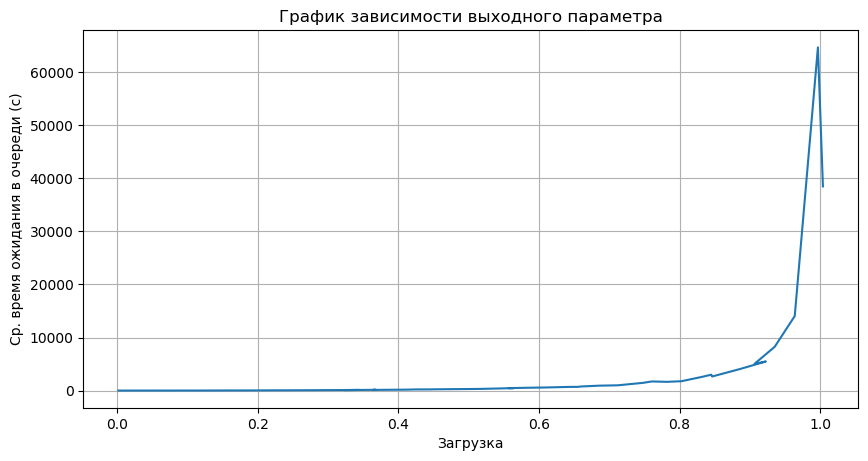

In [7]:
# Plot figures
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.subplot(1, 1, 1)
plt.title("График зависимости выходного параметра")
plt.grid(True)

plt.plot(load_val, time_val)
plt.xlabel("Загрузка")
plt.ylabel("Ср. время ожидания в очереди (с)")

<h1><b> lab_02 </b></h1>

<h2><b> usage </b></h2>

In [8]:
n_factor = 4
m_size = 2 ** n_factor
repeat = 20

def build_plan():
    res = np.ones(shape=(m_size, m_size), dtype=np.float32)
    step = 1
    for j in range(4):
        sign = -1.
        for i in range(m_size):
            res[i, j + 1] = sign
            if (i + 1) % step == 0:
                sign *= -1
        step *= 2

    res[:,  5] = res[:, 1] * res[:, 2]
    res[:,  6] = res[:, 1] * res[:, 3]
    res[:,  7] = res[:, 1] * res[:, 4]
    res[:,  8] = res[:, 2] * res[:, 3]
    res[:,  9] = res[:, 2] * res[:, 4]
    res[:, 10] = res[:, 3] * res[:, 4]
    res[:, 11] = res[:, 1] * res[:, 2] * res[:, 3]
    res[:, 12] = res[:, 1] * res[:, 2] * res[:, 4]
    res[:, 13] = res[:, 1] * res[:, 3] * res[:, 4]
    res[:, 14] = res[:, 2] * res[:, 3] * res[:, 4]
    res[:, 15] = res[:, 1] * res[:, 2] * res[:, 3] * res[:, 4]

    return res

In [9]:
def scale_factor(x, realmin, realmax, xmin=-1, xmax=1):
    return realmin + (realmax - realmin) * (x - xmin) / (xmax - xmin)

In [10]:
def get_equation(a):
    yl = f"{a[0]:.2f}"
    for i in range(1, 5):
        yl += f" + {a[i]:.2f}*x{i}"
    yl = yl.replace("+ -", "- ")

    ynl = yl + f" + {a[5]:.2f}*x1*x2 + {a[6]:.2f}*x1*x3 + {a[7]:.2f}*x1*x4 + "\
                + f"{a[8]:.2f}*x2*x3 + {a[9]:.2f}*x2*x4 + {a[10]:.2f}*x3*x4 + "\
                + f"{a[11]:.2f}*x1*x2*x3 + {a[12]:.2f}*x1*x2*x4 + {a[13]:.2f}*x1*x3*x4 + "\
                + f"{a[14]:.2f}*x2*x3*x4 + {a[15]:.2f}*x1*x2*x3*x4"
    ynl = ynl.replace("+ -", "- ")
    
    return yl, ynl

In [11]:
def get_mult_indexes(xes):
    xes.append(float(xes[1]) * float(xes[2]))
    xes.append(float(xes[1]) * float(xes[3]))
    xes.append(float(xes[1])* float(xes[4]))
    xes.append(float(xes[2]) * float(xes[3]))
    xes.append(float(xes[2]) * float(xes[4]))
    xes.append(float(xes[3]) * float(xes[4]))
    xes.append(float(xes[1]) * float(xes[2]) * float(xes[3]))
    xes.append(float(xes[1]) * float(xes[2]) * float(xes[4]))
    xes.append(float(xes[1]) * float(xes[3]) * float(xes[4]))
    xes.append(float(xes[2]) * float(xes[3]) * float(xes[4]))
    xes.append(float(xes[1]) * float(xes[2]) * float(xes[3]) * float(xes[4]))

    return xes

<h2> <b> GUI </b></h2>

In [ ]:
from PyQt5 import QtWidgets, uic
from PyQt5.QtWidgets import *

class Window(QMainWindow):
    def __init__(self, *args, **kwargs):
        super(Window, self).__init__(*args, **kwargs)
        uic.loadUi("window.ui", self)
        self.plan = build_plan()
        self.fill_table(self.plan)
        self.pushButton_start.clicked.connect(lambda: self.start())
        self.pushButton_delete.clicked.connect(lambda: self.delete())
        self.pushButton_add_dot.clicked.connect(lambda: self.add_dot())
        self.pushButton_delete_dot.clicked.connect(lambda: self.delete_dot())
        # self.plan = build_plan()
        # self.xmat = 0
        # self.b = []

    def fill_table(self, plan):
        table = self.tableWidget_experiment
        shape = np.shape(plan)
        for i in range(shape[0]):
            for j in range(shape[1]):
                item = QTableWidgetItem(
                    str(round(float(plan[i, j]), 4)))
                table.setItem(i, j, item)

    def load_data(self):
        self.mu1_min    = float(self.lineEdit_generator_M1_min.text())
        self.mu1_max    = float(self.lineEdit_generator_M1_max.text())
        self.sig1_min   = float(self.lineEdit_generator_bi1_min.text())
        self.sig1_max   = float(self.lineEdit_generator_bi1_max.text())
        self.mu2_min    = float(self.lineEdit_generator_M2_min.text())
        self.mu2_max    = float(self.lineEdit_generator_M2_max.text())
        self.sig2_min   = float(self.lineEdit_generator_bi2_min.text())
        self.sig2_max   = float(self.lineEdit_generator_bi2_max.text())

    def get_y(self, plan):
        m_size  = np.shape(plan)[0]
        mu_1    = scale_factor(plan[:, 1], self.mu1_min, self.mu1_max)
        sig_1   = scale_factor(plan[:, 2], self.sig1_min, self.sig1_max)
        mu_2    = scale_factor(plan[:, 3], self.mu2_min, self.mu2_max)
        sig_2   = scale_factor(plan[:, 4], self.sig2_min, self.sig2_max)

        y = np.zeros(m_size, dtype=np.float32)
        for i in range(m_size):
            for _ in range(repeat):
                #functions acording to the variants
                func_gen    = lambda: exponential(mu_1[i], sig_1[i])
                func_proc   = lambda: uniform(mu_2[i], sig_2[i])

                model_time = 20
                controller = Controller(func_gen, func_proc, model_time)
                controller.start()

                y[i] += controller.get_wait_time()
            y[i] /= repeat
        return y

    def get_b(self):
        x = self.plan
        b = np.matmul(x.T, x)
        b = np.linalg.inv(b)
        b = np.matmul(b, x.T)
        return b

    def update(self, plan, y):
        y_linear        = np.matmul(plan[:,:n_factor+1], self.a[:n_factor+1])
        y_nonlinear     = np.matmul(plan, self.a)
        y_linear_err    = np.abs(y - y_linear)
        y_nonlinear_err = np.abs(y - y_nonlinear)
        plan_new        = np.column_stack((
            plan, y, y_linear, y_nonlinear, y_linear_err, y_nonlinear_err))
        return plan_new

    def start(self):
        table = self.tableWidget_experiment
        equation = self.lineEdit_lin_mod.text()

        self.load_data()

        if equation == '':
            y         = self.get_y(self.plan)
            b         = self.get_b()
            self.a    = np.matmul(b, y)

            self.plan = self.update(self.plan, y)

            self.fill_table(self.plan)

            yl, ynl   = get_equation(self.a)
            self.lineEdit_lin_mod.setText(str(yl))
            self.lineEdit_part_lin_mod.setText(str(ynl))
        else:
            records = table.rowCount()
            mult = []
            for i in range(m_size, records):
                temp = []
                for j in range(5):
                    val = table.item(i, j).text()
                    temp.append(val)
                
                temp = get_mult_indexes(temp)
                mult.append(temp)
            mult = np.array(mult, dtype=np.float32)

            y = self.get_y(mult)

            plan_new  = self.update(mult, y)
            self.plan = np.append(self.plan, plan_new, axis=0)

            self.fill_table(self.plan)

    def delete(self):
        table = self.tableWidget_experiment
        while table.rowCount() > 0:
            table.removeRow(0)
        while table.rowCount() < m_size:
            table.insertRow(0)
        self.lineEdit_lin_mod.setText("")
        self.lineEdit_part_lin_mod.setText("")

        self.plan = build_plan()
        self.fill_table(self.plan)

    def add_dot(self):
        table = self.tableWidget_experiment
        currentRowCount = table.rowCount()
        table.insertRow(currentRowCount)
        table.setItem(currentRowCount, 0, QTableWidgetItem('1.0'))
        for i in range(1, 5):
            table.setItem(currentRowCount, i, QTableWidgetItem('0.0'))

    def delete_dot(self):
        table = self.tableWidget_experiment
        indices = table.selectionModel().selectedRows()
        for index in sorted(indices):
            table.removeRow(index.row())

app = QtWidgets.QApplication([])
w = Window()
w.show()
app.exec_()